In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import src.names_numbers as NN
from src.names_numbers import heroes as H 
import src.pipeline as pp
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from src.roc import plot_roc
from sklearn.metrics import confusion_matrix, mean_squared_error
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('data/dota2Train.csv', header=None)
df2 = pd.read_csv('data/dota2Test.csv', header=None)
cdf = pd.concat((df, df2), axis=0)
#df.head()
cdf.shape

(102944, 117)

In [9]:
fcdf = pp.fix_cols(cdf)
X, y = pp.rf_fix_n_split(fcdf)
X.shape

(102944, 226)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
# #df.rename(columns={0: 'winner',
#                    1: 'region',
#                    2: 'mode',
#                    3: 'type'}, inplace=True)
# #df.head()

In [31]:
#df.columns = [(i-3) if type(i) == int else i for i in df.columns]

In [32]:
#NN.get_names(df)

In [33]:
#df.head()

In [34]:
#NN.get_nums(df)

In [35]:
#df.head()

In [36]:
# #start random forest work need binary
# # winner column 0 = team B wins,  1 = team A
# rfdf = df.copy()
# for i in ['region', 'mode', 'type']:
#     rfdf.pop(i)
# winner = rfdf.pop('winner')
# y = winner.replace(-1, 0)
# #make X values binary, each column is char-team, 1 denotes picked.
# X = rfdf
# X2 = X.copy()
# X.columns = [(str(i) + 'A') for i in X.columns]
# X2.columns = [(str(i) + 'B') for i in X2.columns]
# X.replace(-1, 0, inplace=True)
# X2.replace(1, 0, inplace=True)
# X2.replace(-1, 1, inplace=True)
# X = pd.concat([X, X2], axis=1)
# X.shape
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# print("\nscore:", rf.score(X_test, y_test))
# y_predict = rf.predict(X_test)
# print("\nconfusion matrix:")
# print(confusion_matrix(y_test, y_predict))
# print("\nprecision:", precision_score(y_test, y_predict))
# print("    recall:", recall_score(y_test, y_predict))

In [11]:
trf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
trf.fit(X_train, y_train)
print("\nscore:", trf.score(X_test, y_test))
y_predict = trf.predict(X_test)
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_predict))
print("\nprecision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


score: 0.5882810071495181

confusion matrix:
[[5652 6499]
 [4097 9488]]

precision: 0.5934822042909864
    recall: 0.6984173721015826


In [14]:
# present = pd.DataFrame([np.zeros(len(X.columns))], columns=X.columns)
# teamA = ['enchantress','oracle','leshrac','bane','beastmaster']
# teamB = ['mirana','phantom_assassin','pudge','legion_commander','juggernaut']
# for hero in teamA:
#     col = str(NN.get_id(hero)) + 'A'
#     present[col] = 1.0
# for hero in teamB:
#     col = str(NN.get_id(hero)) + 'B'
#     present[col] = 1.0
# rf.predict(present)

In [15]:
#names

In [16]:
#rf.predict(present)

NameError: name 'rf' is not defined

In [17]:
# random_forest_grid = {'criterion':['entropy'],
#                       'max_depth': [None, 3, 10],
#                       'max_features': ['sqrt', 'log2', None],
#                       'min_samples_split': [2,4],
#                       'min_samples_leaf': [1,2,4,10],
#                       'bootstrap': [True, False],
#                       'n_estimators': [10, 20, 40, 80, 150, 200, 300],
#                       'random_state': [1]}

# rf_gridsearch = cv.GridSearchCV(RandomForestClassifier(),
#                              random_forest_grid,
#                              n_jobs=-1,
#                              verbose=True,
#                              scoring='neg_log_loss',
#                              cv=5)
# rf_gridsearch.fit(X_train, y_train)
# print("best parameters:        ", rf_gridsearch.best_params_)

# rf_best_estimator = rf_gridsearch.best_estimator_
# print('best estimator:         ', rf_best_estimator)

### XGB work

In [18]:
#XGB testing
#import xgboost as xgb

In [19]:
# y = digits['target']
# X = digits['data']
# kf = KFold(n_splits=2, shuffle=True, random_state=rng)
# for train_index, test_index in kf.split(X):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))

In [20]:
#X.reset_index(inplace=True)
# kf = KFold(n_splits=2, shuffle=True)
# for train_index, test_index in kf.split(X[:20]):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))
#     break

## grphing

In [21]:
hero_pick_dict = {}
for column in X.columns:
    picks = X[column].sum()
    name = NN.get_name(column)[0]
    if name not in hero_pick_dict:
        hero_pick_dict[name] = 0
    hero_pick_dict[name] += picks

lst_of_picks = list(hero_pick_dict.items())
lst_of_picks.sort(key=lambda x: x[1], reverse=True)

In [22]:
print(lst_of_picks[-1:-10:-1])

[('abyssal_underlord', 0), ('wraith_king', 0), ('chen', 790), ('visage', 888), ('brewmaster', 1558), ('lone_druid', 1575), ('wisp', 1592), ('arc_warden', 1791), ('broodmother', 1960)]


In [23]:
print(lst_of_picks[:10])

[('mirana', 32048), ('phantom_assassin', 29802), ('pudge', 28285), ('legion_commander', 26521), ('juggernaut', 23327), ('slark', 23125), ('drow_ranger', 21700), ('invoker', 21262), ('axe', 20264), ('riki', 19670)]


In [24]:
names = [i[0] for i in lst_of_picks]
picks = [i[1] for i in lst_of_picks]

In [25]:
hero_id_dict = {hero['id']: (hero['name'], hero['localized_name'])for hero in H}
hero_name_dict = {hero['name']: hero['id'] for hero in H}
local_names = [i[1] for i in hero_id_dict.values()]

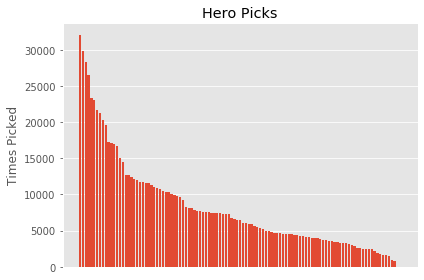

In [26]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), picks)
ax.set_title('Hero Picks')
ax.set_ylabel('Times Picked')
ax.get_xaxis().set_visible(False)
fig.tight_layout()

In [27]:
wdf = X.copy()

In [28]:
wdf['winner'] = y

In [29]:
top_10 = names[:10]
def hero_wins(name):
    hero_id = hero_name_dict[name]
    col_1 = str(hero_id)+'A'
    team_a_win_df = wdf[(wdf[col_1] == 1) & (wdf['winner'] == 1)]
    col_2 = str(hero_id)+'B'
    team_b_win_df = wdf[(wdf[col_2] == 1) & (wdf['winner'] == 0)]
    comb = team_a_win_df.count(axis=0)[col_1] + team_b_win_df.count(axis=0)[col_2]
    return comb


In [30]:
wins = [hero_wins(i) for i in names]

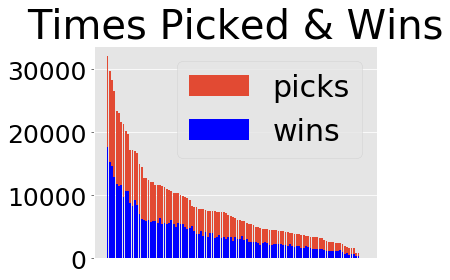

In [31]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), picks, label='picks')
ax.bar(np.arange(len(names)), wins, color='blue', label='wins')
ax.set_title('Times Picked & Wins', fontdict={'fontsize': 40, 'fontweight': 7})
ax.legend(fontsize=30)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
fig.tight_layout()
#fig.savefig('graphs/picksNwins.png')


In [32]:
ratio = np.array(wins) / np.array(picks)

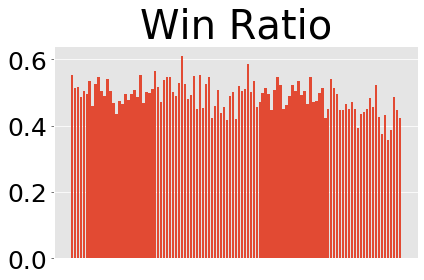

In [33]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), ratio, label='picks')
ax.set_title('Win Ratio', fontdict={'fontsize': 40, 'fontweight': 7})
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
fig.tight_layout()
#fig.savefig('graphs/ratio.png')

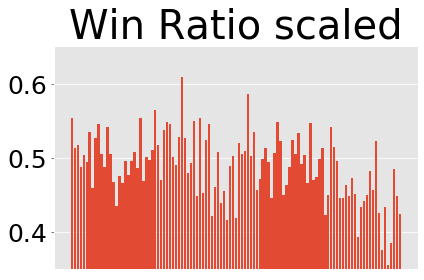

In [34]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), ratio)
ax.set_title('Win Ratio scaled', fontdict={'fontsize': 40, 'fontweight': 7})
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
ax.set_ylim((.35, .65))
#ax.set_ybound((3.0, 6.5))
fig.tight_layout()
#fig.savefig('graphs/ratio-scaled.png')

In [35]:
ratio

array([0.55320145, 0.51345547, 0.51758883, 0.48712341, 0.50439405,
       0.49392432, 0.53474654, 0.45879974, 0.52704303, 0.54550076,
       0.50474647, 0.48807928, 0.54154677, 0.50477726, 0.46697389,
       0.43584606, 0.47550523, 0.46564885, 0.49615727, 0.47753551,
       0.49556716, 0.50752008, 0.4857974 , 0.55347639, 0.46919882,
       0.50159631, 0.49759375, 0.51112337, 0.56445149, 0.5177529 ,
       0.47050913, 0.53713349, 0.54766169, 0.54594703, 0.50147854,
       0.49081474, 0.52858228, 0.60853365, 0.52625794, 0.47980356,
       0.4935394 , 0.54935733, 0.44883003, 0.55387449, 0.45306068,
       0.52455743, 0.54583   , 0.42170771, 0.46018893, 0.50783572,
       0.43872114, 0.45568057, 0.41642592, 0.48889869, 0.50224888,
       0.41954726, 0.52008095, 0.50462046, 0.50940883, 0.58566874,
       0.50247061, 0.5347603 , 0.45669148, 0.47124304, 0.498486  ,
       0.51339376, 0.49414851, 0.44661811, 0.50647146, 0.54771694,
       0.52203169, 0.45014245, 0.46338774, 0.48814536, 0.52399

In [53]:
s_ratio = sorted(ratio)

In [54]:
s_ratio

[0.3555276381909548,
 0.3760204081632653,
 0.38603174603174606,
 0.39389638041163944,
 0.4164259182831201,
 0.41954726215968186,
 0.42170770877944325,
 0.4229848363926576,
 0.4240506329113924,
 0.42609853528628494,
 0.4332774986041318,
 0.4342055365946151,
 0.43584605817729566,
 0.43872113676731794,
 0.44195751138088013,
 0.4461309523809524,
 0.44640718562874254,
 0.4466181061394381,
 0.44819819819819817,
 0.44883003342761635,
 0.44913452778621316,
 0.4495584693604496,
 0.4500792393026941,
 0.45014245014245013,
 0.4515366430260047,
 0.45306068251228254,
 0.45568057080131724,
 0.45669148356637007,
 0.45671887881286066,
 0.45879973661932083,
 0.4601889338731444,
 0.46338773709748565,
 0.4641133896260555,
 0.46564885496183206,
 0.46663477636928963,
 0.46697388632872505,
 0.4691988233258349,
 0.4699549323985979,
 0.47050912584053795,
 0.4712430426716141,
 0.47251717676452215,
 0.47484756097560976,
 0.47550522922072813,
 0.47753551370994385,
 0.4798035604665439,
 0.4828411811652035,
 0.4852

In [36]:
lst_of_picks_by_id = [(NN.get_id(i[0]),i[1]) for i in lst_of_picks]

In [37]:
lst_of_picks_by_id.sort(key=lambda x: x[0], reverse=True)

In [38]:
NN.get_name(str(lst_of_picks_by_id[0][0])+'a')

('arc_warden', 'Arc Warden')

In [55]:
hero_ratio = [(NN.get_name(str(i[0])+'a')[1], chrono_ratio[indx]) for indx, i in enumerate(lst_of_picks_by_id)]

hero_ratio.sort(key=lambda x: x[1], reverse=False)
hero_ratio

[('Wisp', 0.3555276381909548),
 ('Broodmother', 0.3760204081632653),
 ('Lone Druid', 0.38603174603174606),
 ('Enchantress', 0.39389638041163944),
 ("Nature's Prophet", 0.4164259182831201),
 ('Queen of Pain', 0.41954726215968186),
 ('Ember Spirit', 0.42170770877944325),
 ('Tusk', 0.4229848363926576),
 ('Chen', 0.4240506329113924),
 ('Earth Spirit', 0.42609853528628494),
 ('Arc Warden', 0.4332774986041318),
 ('Oracle', 0.4342055365946151),
 ('Windranger', 0.43584605817729566),
 ('Lina', 0.43872113676731794),
 ('Leshrac', 0.44195751138088013),
 ('Gyrocopter', 0.4461309523809524),
 ('Winter Wyvern', 0.44640718562874254),
 ('Templar Assassin', 0.4466181061394381),
 ('Visage', 0.44819819819819817),
 ('Tiny', 0.44883003342761635),
 ('Doom', 0.44913452778621316),
 ('Batrider', 0.4495584693604496),
 ('Bane', 0.4500792393026941),
 ('Puck', 0.45014245014245013),
 ('Naga Siren', 0.4515366430260047),
 ('Rubick', 0.45306068251228254),
 ('Phantom Lancer', 0.45568057080131724),
 ('Magnus', 0.456691483

In [50]:
hero_ratio


[('Abyssal Underlord', nan),
 ('Omniknight', 0.6085336538461539),
 ('Elder Titan', 0.5856687363651619),
 ('Necrophos', 0.564451486625035),
 ('Spectre', 0.5538744901986581),
 ('Skeleton King', 0.5534763948497854),
 ('Silencer', 0.549357326478149),
 ('Centaur Warrunner', 0.5477169443843324),
 ('Abaddon', 0.5467026231919588),
 ('Ursa', 0.537133487654321),
 ('Ogre Magi', 0.5285822757348954),
 ('Medusa', 0.526257938446507),
 ('Treant Protector', 0.5222588623248146),
 ('Spirit Breaker', 0.5177528950138769),
 ('Jakiro', 0.5148960089938167),
 ('Disruptor', 0.5133937562940584),
 ('Phoenix', 0.5126877265665458),
 ('Ancient Apparition', 0.5094088259783514),
 ('Nyx Assassin', 0.5078357200756553),
 ('Keeper of the Light', 0.5064714619138553),
 ('Night Stalker', 0.5048786022237349),
 ('Troll Warlord', 0.5046204620462046),
 ('Undying', 0.5032043674341324),
 ('Alchemist', 0.4955671555224128),
 ('Chaos Knight', 0.49414850686037126),
 ('Slark', 0.4939243243243243),
 ('Weaver', 0.4935393970103876),
 ('Ou

In [41]:
chrono_ratio

NameError: name 'chrono_ratio' is not defined

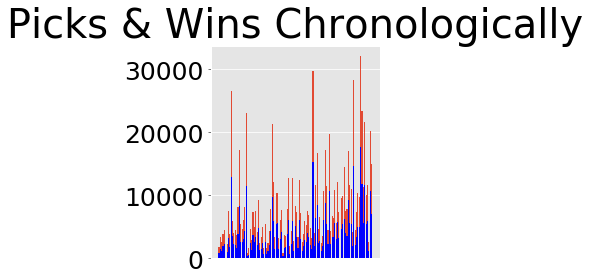

In [42]:
chrono_picks = [i[1] for i in lst_of_picks_by_id]
chrono_wins = [hero_wins(NN.get_name(str(i[0])+'a')[0]) for i in lst_of_picks_by_id]
chrono_ratio = np.array(chrono_wins) / np.array(chrono_picks)
fig, ax = plt.subplots()
ax.set_title('Picks & Wins Chronologically', fontdict={'fontsize': 40, 'fontweight': 7})
#ax.bar(np.arange(len(chrono_picks)), chrono_ratio)
ax.bar(np.arange(len(chrono_picks)), chrono_picks)
ax.bar(np.arange(len(chrono_picks)), chrono_wins, color='blue')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=25, labelcolor='black')
fig.tight_layout()
#fig.savefig('graphs/pickNwin-chrono.png')

In [43]:
# plot_roc(X, y, RandomForestClassifier, 'Random_Forest', bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=None, max_features='sqrt', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=4, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=300,
#                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                        warm_start=False)

In [44]:
names[:5]

['mirana', 'phantom_assassin', 'pudge', 'legion_commander', 'juggernaut']

In [56]:
names

['mirana',
 'phantom_assassin',
 'pudge',
 'legion_commander',
 'juggernaut',
 'slark',
 'drow_ranger',
 'invoker',
 'axe',
 'riki',
 'sniper',
 'shredder',
 'sven',
 'faceless_void',
 'antimage',
 'windrunner',
 'bounty_hunter',
 'huskar',
 'life_stealer',
 'lion',
 'alchemist',
 'bloodseeker',
 'storm_spirit',
 'skeleton_king',
 'tinker',
 'earthshaker',
 'sand_king',
 'slardar',
 'necrolyte',
 'spirit_breaker',
 'nevermore',
 'ursa',
 'crystal_maiden',
 'zuus',
 'morphling',
 'kunkka',
 'ogre_magi',
 'omniknight',
 'medusa',
 'bristleback',
 'weaver',
 'silencer',
 'tiny',
 'spectre',
 'rubick',
 'vengefulspirit',
 'luna',
 'ember_spirit',
 'clinkz',
 'nyx_assassin',
 'lina',
 'phantom_lancer',
 'furion',
 'viper',
 'witch_doctor',
 'queenofpain',
 'tidehunter',
 'troll_warlord',
 'ancient_apparition',
 'elder_titan',
 'dazzle',
 'shadow_shaman',
 'magnataur',
 'shadow_demon',
 'dragon_knight',
 'disruptor',
 'chaos_knight',
 'templar_assassin',
 'keeper_of_the_light',
 'centaur',
 